C:\Users\carnotli\AppData\Local\Temp\ipykernel_31376\1884501753.py:73: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(f)


[1 2 1 2]
[0 0 1 1]
[1 2 1 2]
[1 1 5 5]
[1 2 1 2]
[ 5  5 10 10]
[1 2 1 2]
[10 10 15 15]
[1 2 1 2]
[15 15 20 20]
[1 2 1 2]
[20 20 30 30]
[1 2 1 2]
[30 30 50 50]
[1 2 1 2]
[50 50 70 70]
[1 2 1 2]
[ 70  70 100 100]
[2 5 2 5]
[0 0 1 1]
[2 5 2 5]
[1 1 5 5]
[2 5 2 5]
[ 5  5 10 10]
[2 5 2 5]
[10 10 15 15]
[2 5 2 5]
[15 15 20 20]
[2 5 2 5]
[20 20 30 30]
[2 5 2 5]
[30 30 50 50]
[2 5 2 5]
[50 50 70 70]
[2 5 2 5]
[ 70  70 100 100]
[ 5 10  5 10]
[0 0 1 1]
[ 5 10  5 10]
[1 1 5 5]
[ 5 10  5 10]
[ 5  5 10 10]
[ 5 10  5 10]
[10 10 15 15]
[ 5 10  5 10]
[15 15 20 20]
[ 5 10  5 10]
[20 20 30 30]
[ 5 10  5 10]
[30 30 50 50]
[ 5 10  5 10]
[50 50 70 70]
[ 5 10  5 10]
[ 70  70 100 100]
[10 20 10 20]
[0 0 1 1]
[10 20 10 20]
[1 1 5 5]
[10 20 10 20]
[ 5  5 10 10]
[10 20 10 20]
[10 10 15 15]
[10 20 10 20]
[15 15 20 20]
[10 20 10 20]
[20 20 30 30]
[10 20 10 20]
[30 30 50 50]
[10 20 10 20]
[50 50 70 70]
[10 20 10 20]
[ 70  70 100 100]
[20 50 20 50]
[0 0 1 1]
[20 50 20 50]
[1 1 5 5]
[20 50 20 50]
[ 5  5 10 10]
[20 

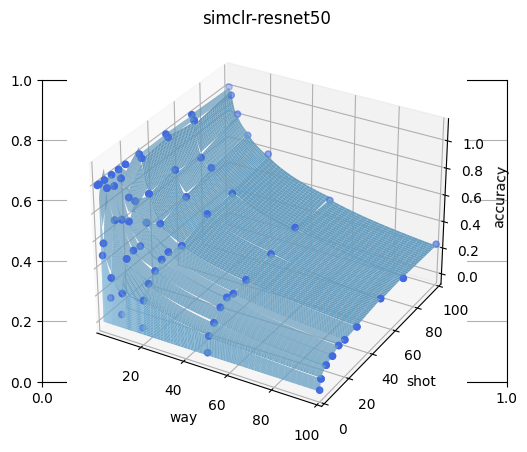

In [82]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import numpy, scipy, scipy.optimize
import matplotlib



def func(data, a, alpha, beta):
    t = data[0]
    p_p = data[1]
    return a * (t**alpha) * (p_p**beta)

def SurfacePlot(func, data, fittedParameters, model_name):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 200)
    yModel = numpy.linspace(min(y_data), max(y_data), 200)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow', linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title(model_name) # add a title for surface plot
    axes.set_zlabel('accuracy') # Z axis data label
    axes.set_xlabel("way")
    axes.set_ylabel("shot")
    axes.set_xlim(min(x_data), max(x_data))
    axes.set_ylim(min(y_data), max(y_data))
    plt.show()


data = {}
model_name = "simclr-resnet50"
way_list = [1, 2, 5, 10, 20,50,100 ]
shot_list = [0, 1, 5, 10, 15, 20, 30, 50, 70, 100]

with open("0410") as f:
   for line in f:
        tokens = line.split(' ')
        model = tokens[0]
        ws = tokens[1]
        acc = tokens[2]
        if model == model_name:
            if ws not in data:
                data[ws] = {}
            data[ws][model] = acc

for way in way_list:
    data[f"{way}way-0shot"] = {} 
    data[f"{way}way-0shot"][model_name] = 1.0/way

for shot in shot_list:
    data[f"1way-{shot}shot"] = {}
    data[f"1way-{shot}shot"][model_name] = 1.0




f = plt.figure( dpi=100)
matplotlib.pyplot.grid(True)
axes = Axes3D(f)
for i in range(1, len(way_list)):
    for j in range(1, len(shot_list)):
        x_data = np.array([way_list[i-1], way_list[i], way_list[i-1], way_list[i]])
        y_data = np.array([shot_list[j-1], shot_list[j-1],shot_list[j], shot_list[j]])
        z_data = np.array([
            float(data[f"{way_list[i-1]}way-{shot_list[j-1]}shot"][model_name]),
            float(data[f"{way_list[i]}way-{shot_list[j-1]}shot"][model_name]),
            float(data[f"{way_list[i-1]}way-{shot_list[j]}shot"][model_name]),
            float(data[f"{way_list[i]}way-{shot_list[j]}shot"][model_name]),
        ])

        fittedParameters, pcov = scipy.optimize.curve_fit(func, [x_data, y_data], z_data, p0 = [1.0, 1.0, 1.0])

        xModel = numpy.linspace(min(x_data), max(x_data), 20)
        yModel = numpy.linspace(min(y_data), max(y_data), 20)
        X, Y = numpy.meshgrid(xModel, yModel)

        print(x_data)
        print(y_data)

        Z = func(numpy.array([X, Y]), *fittedParameters)

        axes.plot_surface(X, Y, Z, rstride=1, cstride=1, color=[0.53,0.8078,0.9804], linewidth=1, antialiased=True)
        axes.scatter(x_data, y_data, z_data, color = [.2549,.4118,.8824]) # show data along with plotted surface

axes.set_title(model_name) # add a title for surface plot
axes.set_zlabel('accuracy') # Z axis data label
axes.set_xlabel("way")
axes.set_ylabel("shot")
axes.set_xlim(1,max( way_list))
axes.set_ylim(0, max(shot_list))
plt.show()


